In [95]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as con

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fontprops = fm.FontProperties(size=16)

# plt.style.use('../../light_mode.mplstyle')

# Load in Data

In [9]:
x = np.genfromtxt('../outputs/globular_cluster/x.dat')
y = np.genfromtxt('../outputs/globular_cluster/y.dat')
z = np.genfromtxt('../outputs/globular_cluster/z.dat')

vx = np.genfromtxt('../outputs/globular_cluster/vx.dat')
vy = np.genfromtxt('../outputs/globular_cluster/vy.dat')
vz = np.genfromtxt('../outputs/globular_cluster/vz.dat')

m = np.genfromtxt('../outputs/globular_cluster/m.dat')
pot = np.genfromtxt('../outputs/globular_cluster/pot.dat')

# Compute Energies

In [14]:
K = []
U = []
t = np.arange(0, x.shape[0], 1) * 1e5

for i in range(x.shape[0]):
    v_2 = vx[i]**2 + vy[i]**2 + vz[i]**2
    K.append(0.5 * np.sum(m[i] * v_2))
    U.append(0.5 *  np.sum(m[i] * pot[i]))
    
K = np.array(K)
U = np.array(U)

# Plot

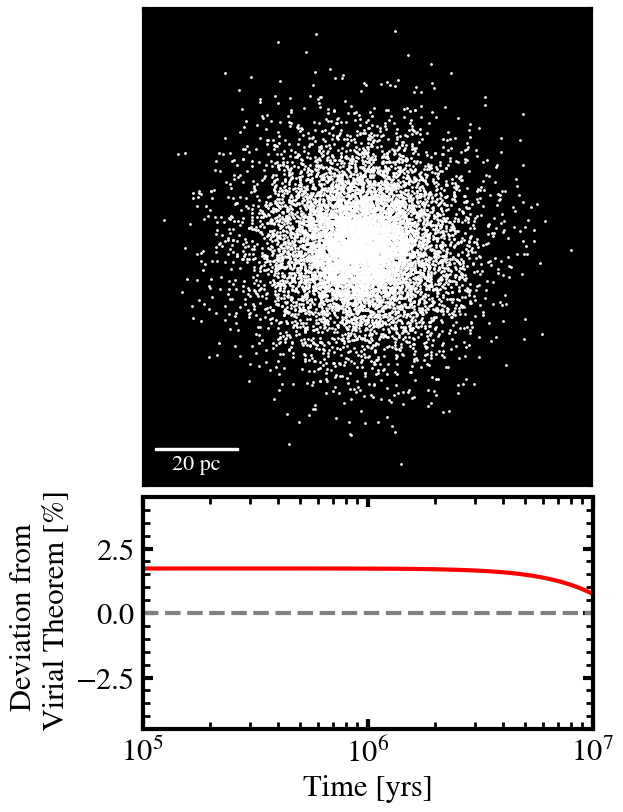

In [109]:
fig = plt.figure(constrained_layout=False, figsize=(6,8))

#create subplots
gridspec_subfigure_1 = fig.add_gridspec(nrows=3, ncols=1, wspace=0, hspace=0.05,  
                                        left=0, right=0.75, top=1.0, bottom=0.1) #dictates the position in the figure

ax_top = fig.add_subplot(gridspec_subfigure_1[0:2])
ax_bottom = fig.add_subplot(gridspec_subfigure_1[2])

i=100

ax_top.set_facecolor('black')
ax_top.scatter(x[i], y[i], s=1, c='white')
ax_top.set_aspect('equal')
ax_top.set_xticks([]); ax_top.set_yticks([])

scalebar0 = AnchoredSizeBar(ax_top.transData,
                           20, '20 pc', 'lower left', 
                           pad=0.4,
                           color='white',
                           frameon=False,
                           size_vertical=0.45,
                           fontproperties=fontprops, sep=3)
ax_top.add_artist(scalebar0)


ax_bottom.plot(t, ((K / (-0.5 * U)) - 1) * 100, color='red')
ax_bottom.hlines(y = 0, xmin = 1e5, xmax=1e7, color='gray', ls='--', lw=3)
ax_bottom.set_ylim(-4.5, 4.5)
ax_bottom.set_xlim(1e5, 1e7)
ax_bottom.semilogx()
ax_bottom.set_ylabel('Deviation from \n Virial Theorem [%]')
ax_bottom.set_xlabel('Time [yrs]')
# plt.savefig('M15.png', dpi=300, bbox_inches='tight')
